In [1]:
#Series multiindex
import numpy as np
import pandas as pd
letters = list('ABC')
num = list(range(10))

mi = pd.MultiIndex.from_product([letters, num])
s = pd.Series(np.random.rand(30),index = mi)
s

A  0    0.306440
   1    0.197415
   2    0.807850
   3    0.936484
   4    0.698800
   5    0.038628
   6    0.467904
   7    0.967078
   8    0.108932
   9    0.878552
B  0    0.045298
   1    0.987759
   2    0.784834
   3    0.865364
   4    0.547066
   5    0.251426
   6    0.531145
   7    0.867871
   8    0.996862
   9    0.241838
C  0    0.430992
   1    0.896842
   2    0.206500
   3    0.235194
   4    0.876489
   5    0.818099
   6    0.244695
   7    0.756291
   8    0.357129
   9    0.395721
dtype: float64

In [2]:
# multiindex query
s.loc[:,[1,3,6]]

A  1    0.197415
   3    0.936484
   6    0.467904
B  1    0.987759
   3    0.865364
   6    0.531145
C  1    0.896842
   3    0.235194
   6    0.244695
dtype: float64

In [3]:
# multiindex slice
s.loc[pd.IndexSlice[:'B',5:]]

A  5    0.038628
   6    0.467904
   7    0.967078
   8    0.108932
   9    0.878552
B  5    0.251426
   6    0.531145
   7    0.867871
   8    0.996862
   9    0.241838
dtype: float64

In [4]:
# create dataframe from multiindex 
frame = pd.DataFrame(np.arange(12).reshape(6,2),
                    index =[list('AAABBB'),list('123123')],
                    columns = ['hello','shiyanlou'])
frame

hello  shiyanlou
A 1      0          1
  2      2          3
  3      4          5
B 1      6          7
  2      8          9
  3     10         11

In [5]:
# index name
frame.index.names = ['first','second']
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

In [6]:
frame.groupby('first').sum()

,hello,shiyanlou
first,,
A,6,9
B,24,27


In [7]:
frame

hello  shiyanlou
first second                  
A     1           0          1
      2           2          3
      3           4          5
B     1           6          7
      2           8          9
      3          10         11

In [8]:
# reverse pivot
frame.stack()

first  second           
A      1       hello         0
               shiyanlou     1
       2       hello         2
               shiyanlou     3
       3       hello         4
               shiyanlou     5
B      1       hello         6
               shiyanlou     7
       2       hello         8
               shiyanlou     9
       3       hello        10
               shiyanlou    11
dtype: int32

In [9]:
# pivot
frame.unstack()

hello        shiyanlou       
second     1  2   3         1  2   3
first                               
A          0  2   4         1  3   5
B          6  8  10         7  9  11

In [10]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data, index=labels)

In [11]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [12]:
# column query
df[df['age']>3]

,animal,age,visits,priority
e,dog,5.0,2,no
g,snake,4.5,1,no
i,dog,7.0,2,no


In [13]:
# query by indexlabel
df.iloc[2:4,1:3]

,age,visits
c,0.5,2
d,NaN,3


In [14]:
# multi query with label
df[(df['age']<3) & (df['animal']=='cat')]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


In [15]:
df[(df['age']<3) | (df['animal']=='cat')]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
f,cat,2.0,3,no
h,cat,NaN,1,yes


In [16]:
df[df['animal'].isin(['cat','dog'])]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


In [17]:
# query by label and column
df.loc[df.index[[3,4,8]],['animal','age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


In [18]:
# sort by multi column
df.sort_values(by=['age','visits'],ascending=[False,True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


In [19]:
# multi replace
df['priority'].map({'yes':True,'no':False})

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

In [20]:
# group by 
df.groupby('animal').sum()

,age,visits
animal,,
cat,7.5,8
dog,15.0,8
snake,5.0,3


In [21]:
temp_df1 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 1
temp_df2 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 2
temp_df3 = pd.DataFrame(np.random.randn(5, 4)) # 生成由随机数组成的 DataFrame 3

print(temp_df1)
print(temp_df2)
print(temp_df3)

          0         1         2         3
0  2.217167  0.703974 -0.936386  0.816138
1  3.220032 -1.397112  0.582660  0.964966
2  0.566727  1.532727  1.083420  0.628037
3 -1.150373  1.495798 -1.002061 -0.033191
4  1.106163 -1.324753  1.208626  1.218141
          0         1         2         3
0 -0.217376  0.414122  0.164470  0.305241
1  1.393507 -0.415893 -0.338129 -1.301215
2 -0.521589 -2.068864 -0.164049 -1.058620
3 -0.700386  0.756163  2.010523  0.152772
4  0.304461 -0.077856  1.453972 -1.544250
          0         1         2         3
0 -0.872974  0.114326  1.119873  0.269800
1 -0.253181 -0.650975 -0.277004 -0.742067
2  2.328414  1.081424  1.174998 -1.441001
3 -1.172781 -2.780542  1.123093  0.588030
4 -0.871371 -0.058046 -0.341645  0.919147


In [22]:
# merge multi tables
pieces = [temp_df1, temp_df2, temp_df3]
pd.concat(pieces)

,0,1,2,3
0,2.217167,0.703974,-0.936386,0.816138
1,3.220032,-1.397112,0.582660,0.964966
2,0.566727,1.532727,1.083420,0.628037
3,-1.150373,1.495798,-1.002061,-0.033191
4,1.106163,-1.324753,1.208626,1.218141
0,-0.217376,0.414122,0.164470,0.305241
1,1.393507,-0.415893,-0.338129,-1.301215
2,-0.521589,-2.068864,-0.164049,-1.058620
3,-0.700386,0.756163,2.010523,0.152772
4,0.304461,-0.077856,1.453972,-1.544250


In [23]:
# find min(sum(column))
df = pd.DataFrame(np.random.random(size=(5,10)),columns=list('abcdefghij'))
print(df)
df.sum().idxmin()
# idxmax(),idxmain() return the index of max, min

          a         b         c         d         e         f         g  \
0  0.483091  0.821269  0.652293  0.904047  0.362687  0.521780  0.447790   
1  0.058577  0.254003  0.050621  0.550631  0.650007  0.858023  0.024715   
2  0.031446  0.899924  0.039538  0.643597  0.832247  0.421534  0.433019   
3  0.124633  0.108524  0.307779  0.406726  0.677264  0.910999  0.471065   
4  0.074037  0.872756  0.080705  0.466672  0.572192  0.327160  0.991005   

          h         i         j  
0  0.192005  0.054493  0.494044  
1  0.508239  0.027441  0.496479  
2  0.234888  0.093924  0.088908  
3  0.351973  0.968761  0.243098  
4  0.774314  0.179476  0.063541  


'a'

In [24]:
# every element sub the avg of row
df = pd.DataFrame(np.random.random(size=(5,3)))
print(df)
df.sub(df.mean(axis = 1),axis = 0)
#df.sub(other,...)

          0         1         2
0  0.787407  0.268477  0.996509
1  0.758353  0.418254  0.917547
2  0.873862  0.106524  0.004230
3  0.999245  0.616272  0.150114
4  0.988993  0.551748  0.224637


,0,1,2
0,0.103276,-0.415654,0.312378
1,0.060301,-0.279797,0.219496
2,0.545657,-0.221682,-0.323975
3,0.410701,0.027729,-0.438430
4,0.400533,-0.036711,-0.363823


In [25]:
# group by and sum the largest 3 num
df1 = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df1)
df1.groupby('A')['B'].nlargest(3).sum(level =0)

    A    B
0   a   12
1   a  345
2   a    3
3   b    1
4   b   45
5   c   14
6   a    4
7   a   52
8   b   54
9   c   23
10  c  235
11  c   21
12  b   57
13  b    3
14  c   87


A
a    409
b    156
c    345
Name: B, dtype: int64

In [26]:
# create new table , pivot 'A','B','C'
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                'B' : ['A', 'B', 'C'] * 4,
                'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                'D' : np.random.randn(12),
                'E' : np.random.randn(12)})
print(df)

        A  B    C         D         E
0     one  A  foo  2.719506 -0.688869
1     one  B  foo -1.007802  0.938220
2     two  C  foo  0.527891  0.241371
3   three  A  bar  1.497328  0.914214
4     one  B  bar -0.233053 -1.146980
5     one  C  bar -0.412613 -0.948536
6     two  A  foo -0.556100  0.700884
7   three  B  foo  0.362145 -0.649742
8     one  C  foo -0.424294 -0.875892
9     one  A  bar -0.099596 -0.267748
10    two  B  bar  0.939416 -0.876016
11  three  C  bar  0.259700  2.581951


In [27]:
# index with A,B
pd.pivot_table(df,index=['A','B'])

D         E
A     B                    
one   A  1.309955 -0.478308
      B -0.620427 -0.104380
      C -0.418454 -0.912214
three A  1.497328  0.914214
      B  0.362145 -0.649742
      C  0.259700  2.581951
two   A -0.556100  0.700884
      B  0.939416 -0.876016
      C  0.527891  0.241371

In [28]:
# index with A,B,values with D,avg is default
pd.pivot_table(df,values=['D'],index=['A','B'])

D
A     B          
one   A  1.309955
      B -0.620427
      C -0.418454
three A  1.497328
      B  0.362145
      C  0.259700
two   A -0.556100
      B  0.939416
      C  0.527891

In [29]:
pd.pivot_table(df,values=['D'],index=['A','B'],aggfunc=[np.sum,len])

sum  len
                D    D
A     B               
one   A  2.619910  2.0
      B -1.240855  2.0
      C -0.836908  2.0
three A  1.497328  1.0
      B  0.362145  1.0
      C  0.259700  1.0
two   A -0.556100  1.0
      B  0.939416  1.0
      C  0.527891  1.0

In [30]:
# pivot with A,B, values with D.sum, C is also need
pd.pivot_table(df, values=['D'], index=['A','B'],aggfunc=np.sum,columns=['C'])

D          
C             bar       foo
A     B                    
one   A -0.099596  2.719506
      B -0.233053 -1.007802
      C -0.412613 -0.424294
three A  1.497328       NaN
      B       NaN  0.362145
      C  0.259700       NaN
two   A       NaN -0.556100
      B  0.939416       NaN
      C       NaN  0.527891

In [31]:
# fill_value
pd.pivot_table(df,values=['D'],index=('A','B'),columns=['C'],aggfunc=np.sum,fill_value=0)

D          
C             bar       foo
A     B                    
one   A -0.099596  2.719506
      B -0.233053 -1.007802
      C -0.412613 -0.424294
three A  1.497328  0.000000
      B  0.000000  0.362145
      C  0.259700  0.000000
two   A  0.000000 -0.556100
      B  0.939416  0.000000
      C  0.000000  0.527891

In [32]:
# absulte num绝对类型
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df['grade'] = df['raw_grade'].astype('category')
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [33]:
df['grade'].cat.categories = ['very good', 'good','very bad']
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [34]:
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [35]:
df.sort_values('grade')

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [36]:
df.groupby('grade').size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

In [37]:
# clean 
#FightNumber 缺省值按照规律进行增长
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10035, np.nan, 10065, np.nan, 10091],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10035,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10050,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10078,[13],12. Air France
4,Brussels_londOn,10091,"[67, 32]","""Swiss Air"""


In [38]:
temp = df.From_To.str.split('_',expand=True)
temp.columns=['From','To']
temp

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


In [39]:
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

In [40]:
temp

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


In [41]:
df = df.drop('From_To',axis =1).join(temp)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10035,"[23, 47]",KLM(!),London,Paris
1,10050,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10078,[13],12. Air France,Budapest,Paris
4,10091,"[67, 32]","""Swiss Air""",Brussels,London


In [42]:
df['Airline'] = df['Airline'].str.extract('([\w\s]+)',expand=False).str.strip()
df

,FlightNumber,RecentDelays,Airline,From,To
0,10035,"[23, 47]",KLM,London,Paris
1,10050,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10078,[13],12,Budapest,Paris
4,10091,"[67, 32]",Swiss Air,Brussels,London


In [43]:
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays',axis=1).join(delays)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10035,KLM,London,Paris,23.0,47.0,NaN
1,10050,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10078,12,Budapest,Paris,13.0,NaN,NaN
4,10091,Swiss Air,Brussels,London,67.0,32.0,NaN


In [44]:
df1 = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10035, np.nan, 10065, np.nan, 10091],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df1['FlightNumber'] = df1['FlightNumber'].interpolate().astype(int)
delays1 = df1['RecentDelays'].apply(pd.Series)

In [45]:
delays1

,0,1,2
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [46]:
delays1.columns = ['delays1_{}'.format(n) for n in range(1,len(delays.columns)+1)]
delays1

,delays1_1,delays1_2,delays1_3
0,23.0,47.0,NaN
1,NaN,NaN,NaN
2,24.0,43.0,87.0
3,13.0,NaN,NaN
4,67.0,32.0,NaN


In [47]:
df=pd.DataFrame({'name':['Alice','Bob','Candy','Dany','Ella','Frank','Grace','Jenny'],'grades':[58,83,79,65,93,45,61,88]})

In [48]:
df

,name,grades
0,Alice,58
1,Bob,83
2,Candy,79
3,Dany,65
4,Ella,93
5,Frank,45
6,Grace,61
7,Jenny,88


In [49]:
def choice(x):
    if x>60:
        return 1
    else:
        return 0
df.grades= pd.Series(map(lambda x:choice(x),df.grades))
df

,name,grades
0,Alice,0
1,Bob,1
2,Candy,1
3,Dany,1
4,Ella,1
5,Frank,0
6,Grace,1
7,Jenny,1


In [50]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
df.loc[df['A'].shift() != df['A']]

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


> 96. 数据归一化

有时候，DataFrame 中不同列之间的数据差距太大，需要对其进行归一化处理。
其中，Max-Min 归一化是简单而常见的一种方式，公式如下:

$$Y=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [51]:
def normalization(df):
    numerator=df.sub(df.min())
    denominator=(df.max()).sub(df.min())
    Y=numerator.div(denominator)
    return Y
df = pd.DataFrame(np.random.random(size=(5, 3)))
print(df)
normalization(df)

          0         1         2
0  0.000053  0.569935  0.633507
1  0.886954  0.763764  0.607381
2  0.009153  0.118532  0.704663
3  0.271742  0.661546  0.486366
4  0.367277  0.291981  0.702131


,0,1,2
0,0.000000,0.699598,0.674037
1,1.000000,1.000000,0.554358
2,0.010260,0.000000,1.000000
3,0.306335,0.841579,0.000000
4,0.414053,0.268816,0.988399


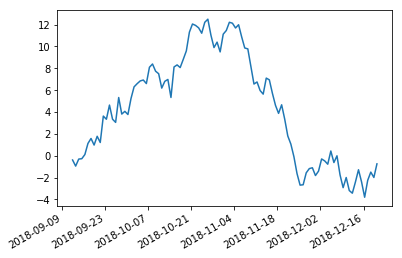

In [52]:
%matplotlib inline
ts = pd.Series(np.random.randn(100), index=pd.date_range('today', periods=100))
ts = ts.cumsum()
ts.plot()

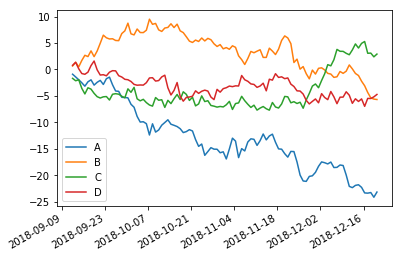

In [53]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot()

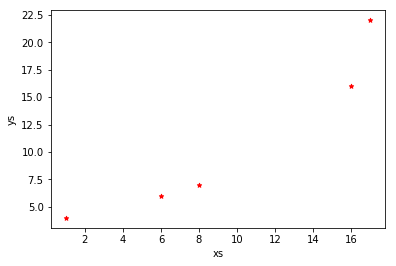

In [54]:
df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})
df = df.cumsum()
df.plot.scatter("xs","ys",color='red',marker="*")

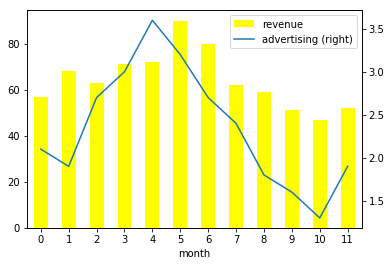

In [55]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

ax = df.plot.bar("month", "revenue", color = "yellow")
df.plot("month", "advertising", secondary_y = True, ax = ax)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string

In [6]:
df1 = pd.DataFrame(np.random.randn(8,4), index=pd.date_range('20181001', periods=8), columns=list(string.ascii_uppercase[:4]))

In [7]:
df1

,A,B,C,D
2018-10-01,-0.297100,-1.060061,-0.014709,0.367480
2018-10-02,0.927548,2.411015,-0.987385,-1.404790
2018-10-03,2.310098,1.065832,0.200520,0.390430
2018-10-04,0.602720,-0.793961,1.428286,1.129054
2018-10-05,-0.449108,0.776392,-0.966759,-0.913630
2018-10-06,-1.066686,-0.408435,-0.531514,-1.325754
2018-10-07,-0.042104,-0.292945,-0.689929,-1.543356
2018-10-08,0.269441,0.463794,-2.605838,-0.800399


In [8]:
c = pd.Series([3]*4, dtype='int32')

In [9]:
c

0    3
1    3
2    3
3    3
dtype: int32

In [17]:
df2 = pd.DataFrame({'A':1.,
                   'B':pd.Timestamp('20181001'),
                   'C':pd.Series([3]*4, dtype='int32'),
                   'D':np.array([2.]*4, dtype='float32'),
                   'E':pd.Series(1., index=range(4), dtype='float32'),
                   'F':pd.Categorical(['test', 'train', 'train', 'test']),
                   'G':'foo'})

In [18]:
df2

,A,B,C,D,E,F,G
0,1.0,2018-10-01,3,2.0,1.0,test,foo
1,1.0,2018-10-01,3,2.0,1.0,train,foo
2,1.0,2018-10-01,3,2.0,1.0,train,foo
3,1.0,2018-10-01,3,2.0,1.0,test,foo
